<a href="https://colab.research.google.com/github/hibadash/-Breast-Ultrasound-Classification-Using-Xception-CNN-BUSI-Dataset/blob/ModelTraining/notebooks/03_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/hibadash/-Breast-Ultrasound-Classification-Using-Xception-CNN-BUSI-Dataset/blob/ModelTraining/notebooks/03_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 03 — Évaluation du modèle Xception
Ce notebook Colab permet d'évaluer le modèle Xception entraîné sur le dataset BUSI.

## Objectifs :

- Charger le modèle sauvegardé (model_xception_best.h5 ou model_xception_final.h5).
- Calculer les métriques principales : accuracy, F1-score (macro, weighted), ROC-AUC.
- Générer les visualisations : matrices de confusion (brute/normalisée) et courbes ROC multi-classes.
- Exporter un rapport de classification et un résumé JSON des métriques.
## Prérequis :

Avoir exécuté le notebook d'entraînement et téléchargé les fichiers .h5.
Déposer le modèle choisi dans le dossier results/ du projet avant de lancer la cellule d'évaluation (ou monter Google Drive et y accéder).

### Préparation de l'environnement


In [8]:
# Étape 1 — Nettoyage éventuel de l'environnement Colab
import os
import shutil

if os.path.exists("breast_project"):
    shutil.rmtree("breast_project")
    print("Répertoire 'breast_project' supprimé pour repartir proprement.")
else:
    print("Aucun répertoire 'breast_project' à supprimer.")

Aucun répertoire 'breast_project' à supprimer.


In [9]:
# Étape 2 — Clonage du dépôt et positionnement dans le dossier racine
!git clone --branch ModelTraining --single-branch https://github.com/hibadash/-Breast-Ultrasound-Classification-Using-Xception-CNN-BUSI-Dataset.git breast_project

import os
os.chdir("breast_project")
print("Répertoire courant :", os.getcwd())
print("Contenu du projet :")
!ls

Cloning into 'breast_project'...
remote: Enumerating objects: 5957, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 5957 (delta 17), reused 15 (delta 10), pack-reused 5908 (from 4)
Receiving objects: 100% (5957/5957), 459.40 MiB | 33.94 MiB/s, done.
Resolving deltas: 100% (260/260), done.
Updating files: 100% (8314/8314), done.
Répertoire courant : /content/breast_project/breast_project/breast_project
Contenu du projet :
app  data  notebooks  overview	README.md  requirements.txt  results  src


In [ ]:
!pip install -q tensorflow==2.15 seaborn scikit-learn matplotlib numpy

### Imports et configuration globale

In [10]:
# Étape 1 — Imports et configuration
import os
import sys
import json
import runpy

import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
from IPython.display import Image, display

import tensorflow as tf

PROJECT_ROOT = os.getcwd()
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)

from data.preprocess import test_generator

try:
    from src.evaluate import evaluate_model
except (ImportError, AttributeError) as exc:
    evaluate_globals = runpy.run_path(os.path.join(PROJECT_ROOT, "src", "evaluate.py"))
    evaluate_model = evaluate_globals.get("evaluate_model")
    if evaluate_model is None:
        raise ImportError("Impossible de charger evaluate_model depuis src/evaluate.py") from exc
    print("[INFO] evaluate_model importé via runpy (fallback). Détail de l'exception initiale:", exc)

RESULTS_DIR = "results"
MODEL_PATH = os.path.join(RESULTS_DIR, "model_xception_best.h5")
RUN_NAME = "test_split"

[INFO] evaluate_model importé via runpy (fallback). Détail de l'exception initiale: cannot import name 'evaluate_model' from 'src.evaluate' (/content/breast_project/src/evaluate.py)


In [11]:
# Étape 2  — Vérifications préliminaires
print("Fichier modèle attendu :", MODEL_PATH)
print("Répertoire des résultats :", os.path.abspath(RESULTS_DIR))
print("Répertoire courant :", os.getcwd())
print("Test generator classes :", test_generator.class_indices)
print("Nombre d'images de test :", test_generator.samples)

if not os.path.exists(MODEL_PATH):
    raise FileNotFoundError(
        f"Le fichier {MODEL_PATH} est introuvable. Vérifiez le chemin ou téléversez le modèle."
    )
else:
    print("Modèle trouvé, prêt pour l'évaluation.")

Fichier modèle attendu : results/model_xception_best.h5
Répertoire des résultats : /content/breast_project/breast_project/breast_project/results
Répertoire courant : /content/breast_project/breast_project/breast_project
Test generator classes : {'benign': 0, 'malignant': 1, 'normal': 2}
Nombre d'images de test : 237
Modèle trouvé, prêt pour l'évaluation.


### Évaluation du modèle sur le jeu de test

In [12]:
# Étape 3 — Évaluation du modèle
results = evaluate_model(
    model_path=MODEL_PATH,
    data_generator=test_generator,
    results_dir=RESULTS_DIR,
    run_name=RUN_NAME,
)

print("Métriques globales :")
print(json.dumps(results["metrics"], indent=2))

print("\nClassification report :")
print(results["classification_report"])

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Métriques globales :
{
  "accuracy": 0.7637130801687764,
  "f1_macro": 0.7737530689805939,
  "f1_weighted": 0.7677513717778404,
  "roc_auc_macro": 0.92979660248956,
  "roc_auc_weighted": 0.9139290035601744,
  "roc_auc_micro": 0.9174900745963075
}

Classification report :
              precision    recall  f1-score   support

      benign     0.8762    0.6917    0.7731       133
   malignant     0.6000    0.8906    0.7170        64
      normal     0.8649    0.8000    0.8312        40

    accuracy                         0.7637       237
   macro avg     0.7804    0.7941    0.7738       237
weighted avg     0.7997    0.7637    0.7678       237



###  Visualisation des artefacts générés

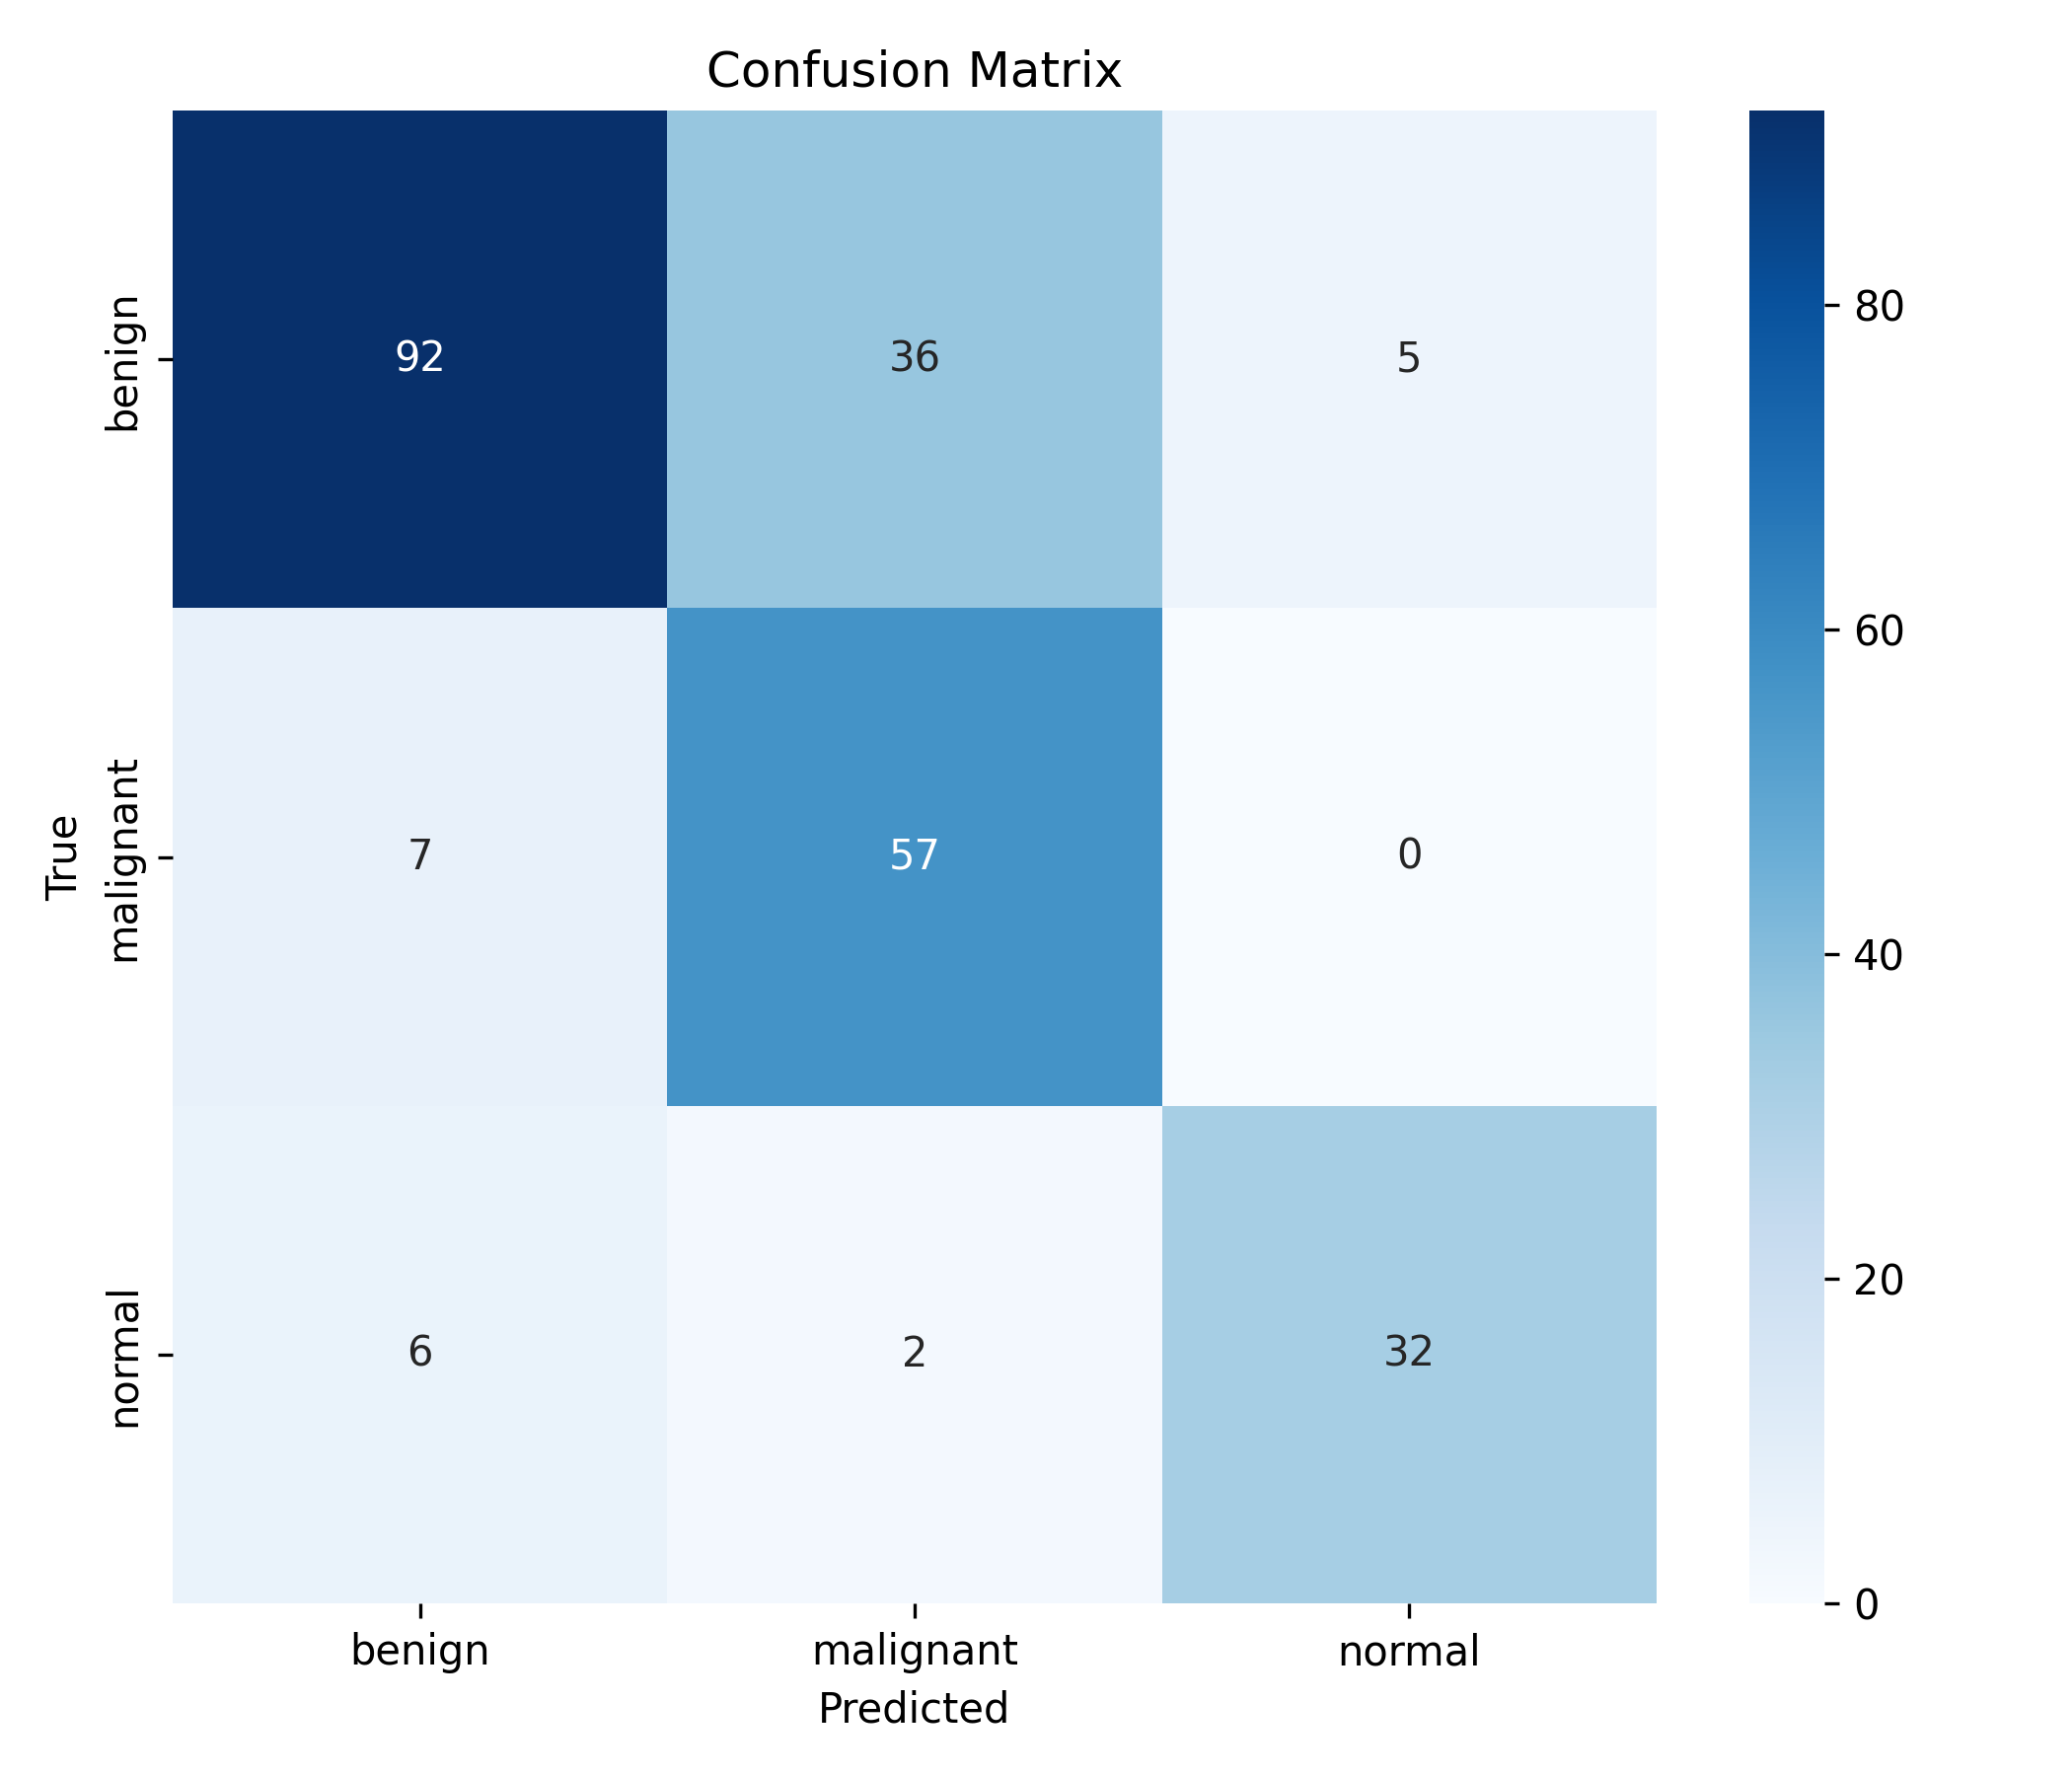

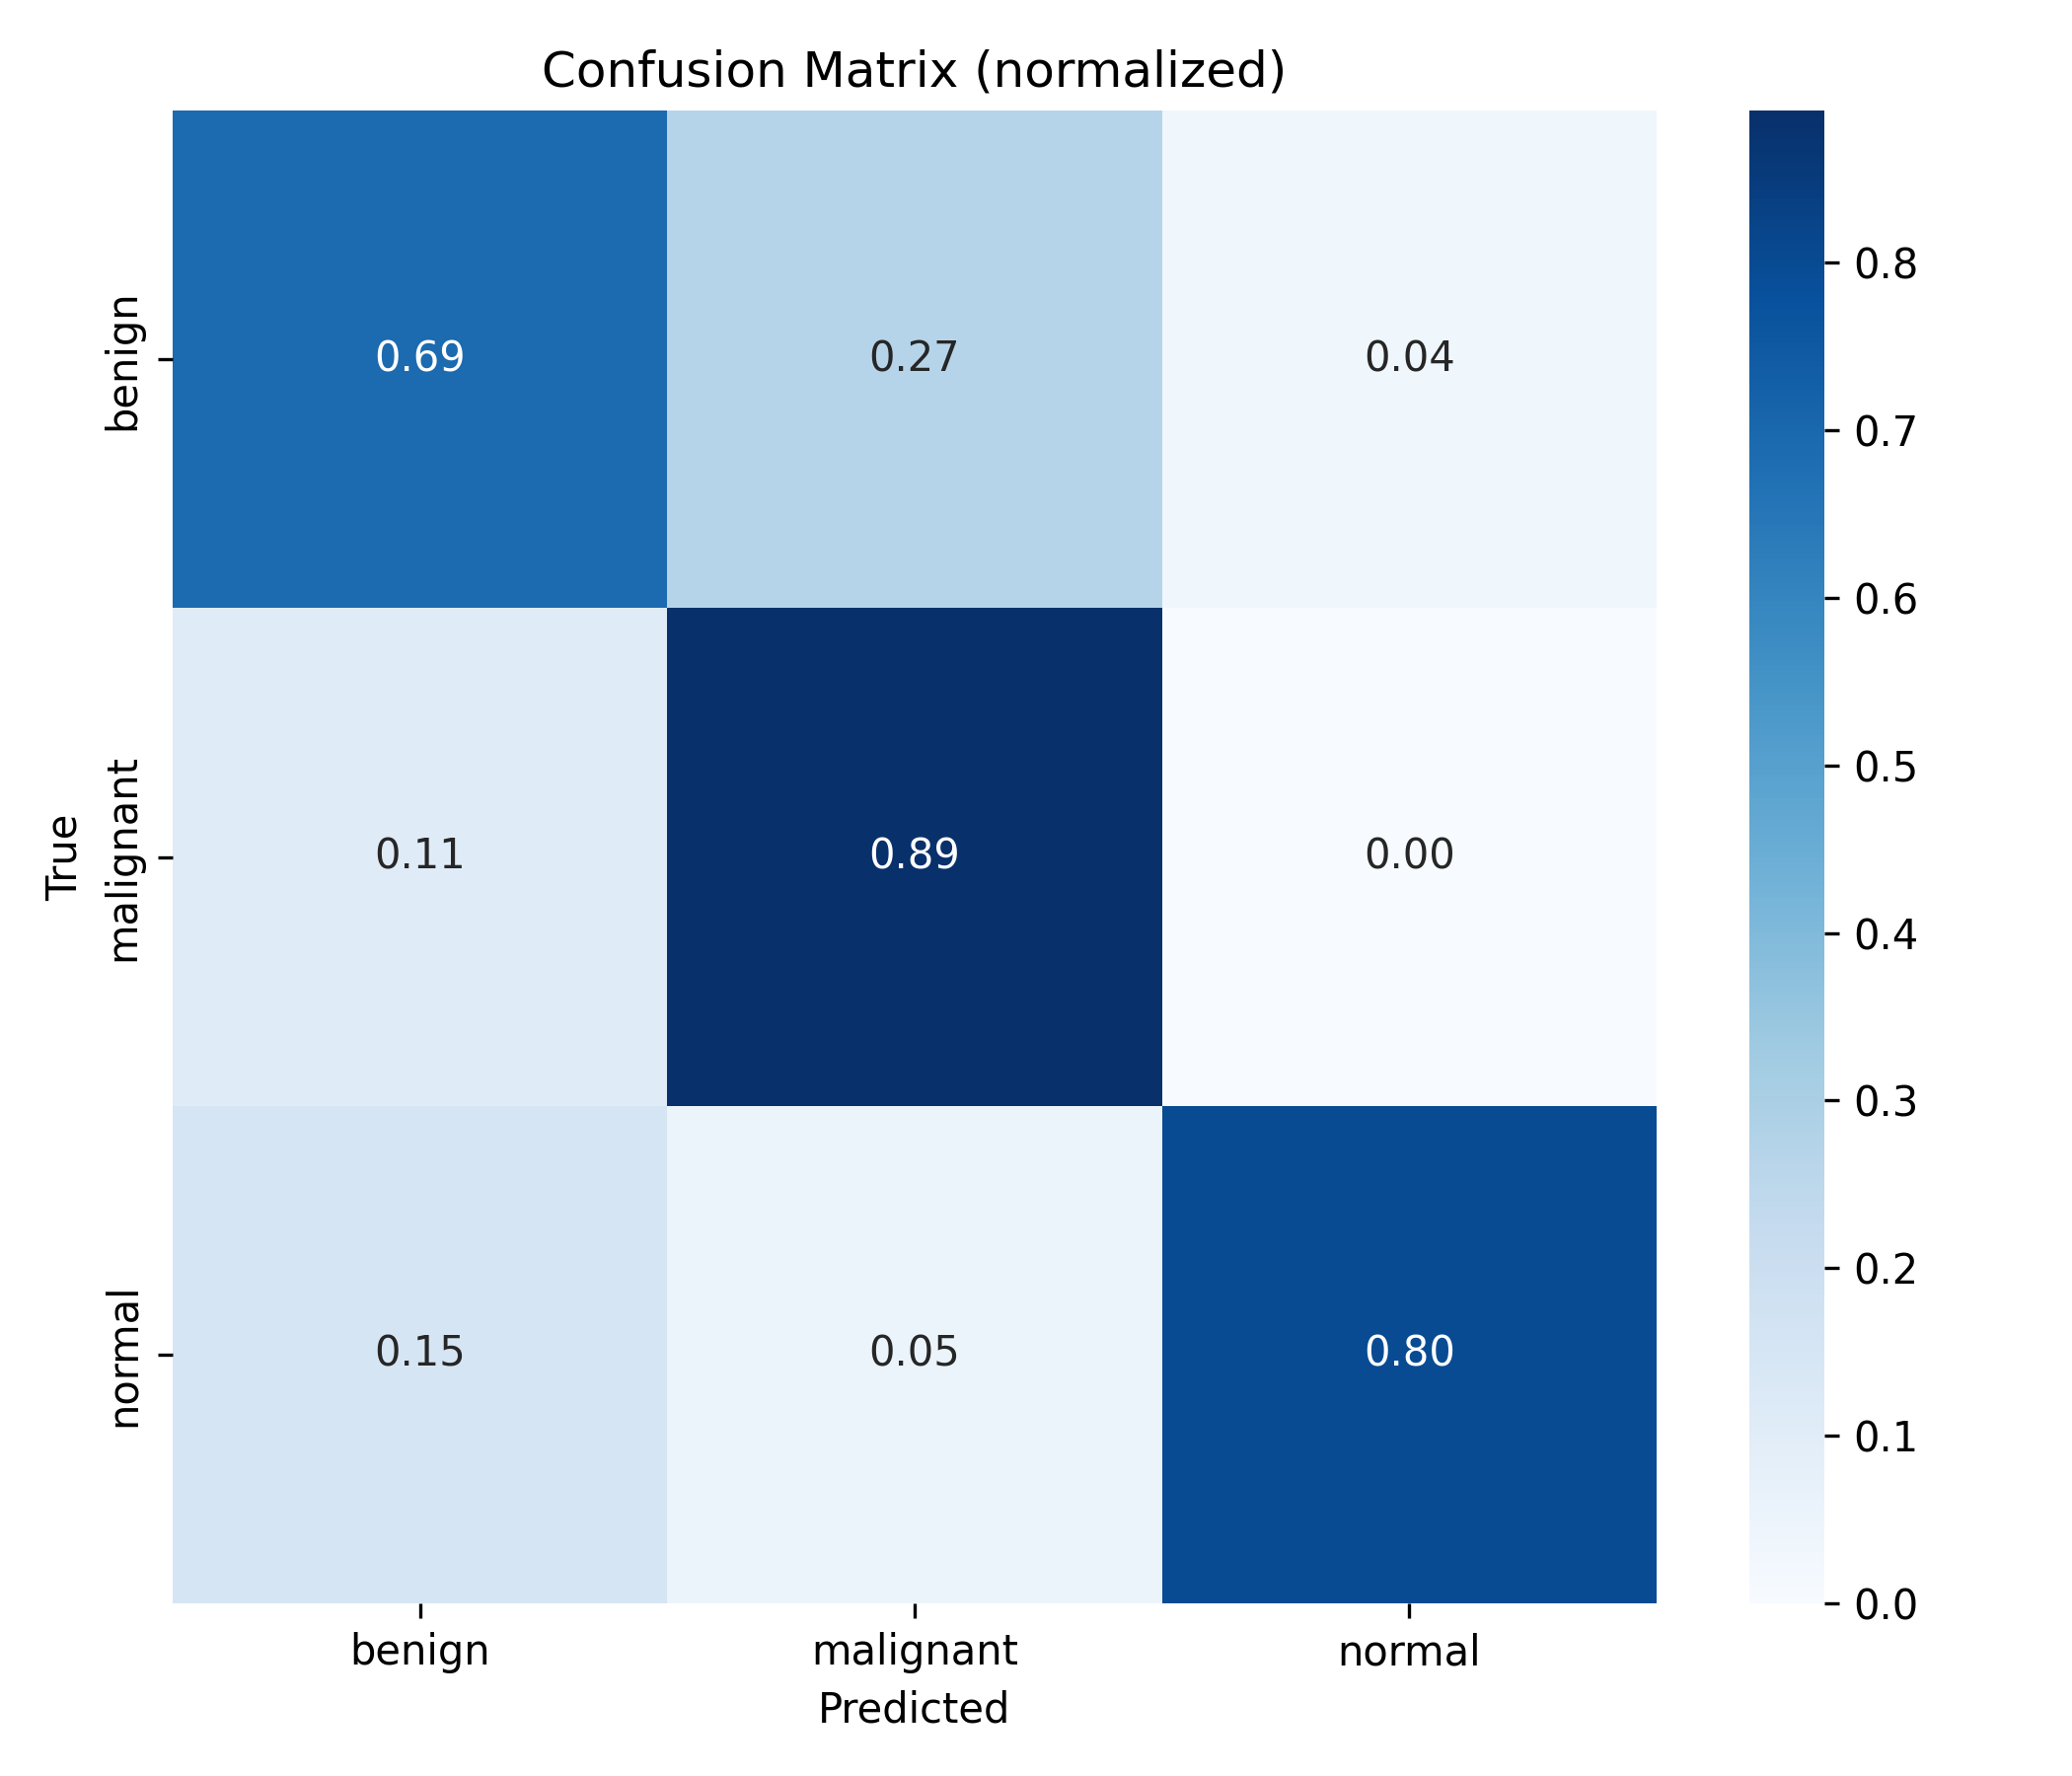

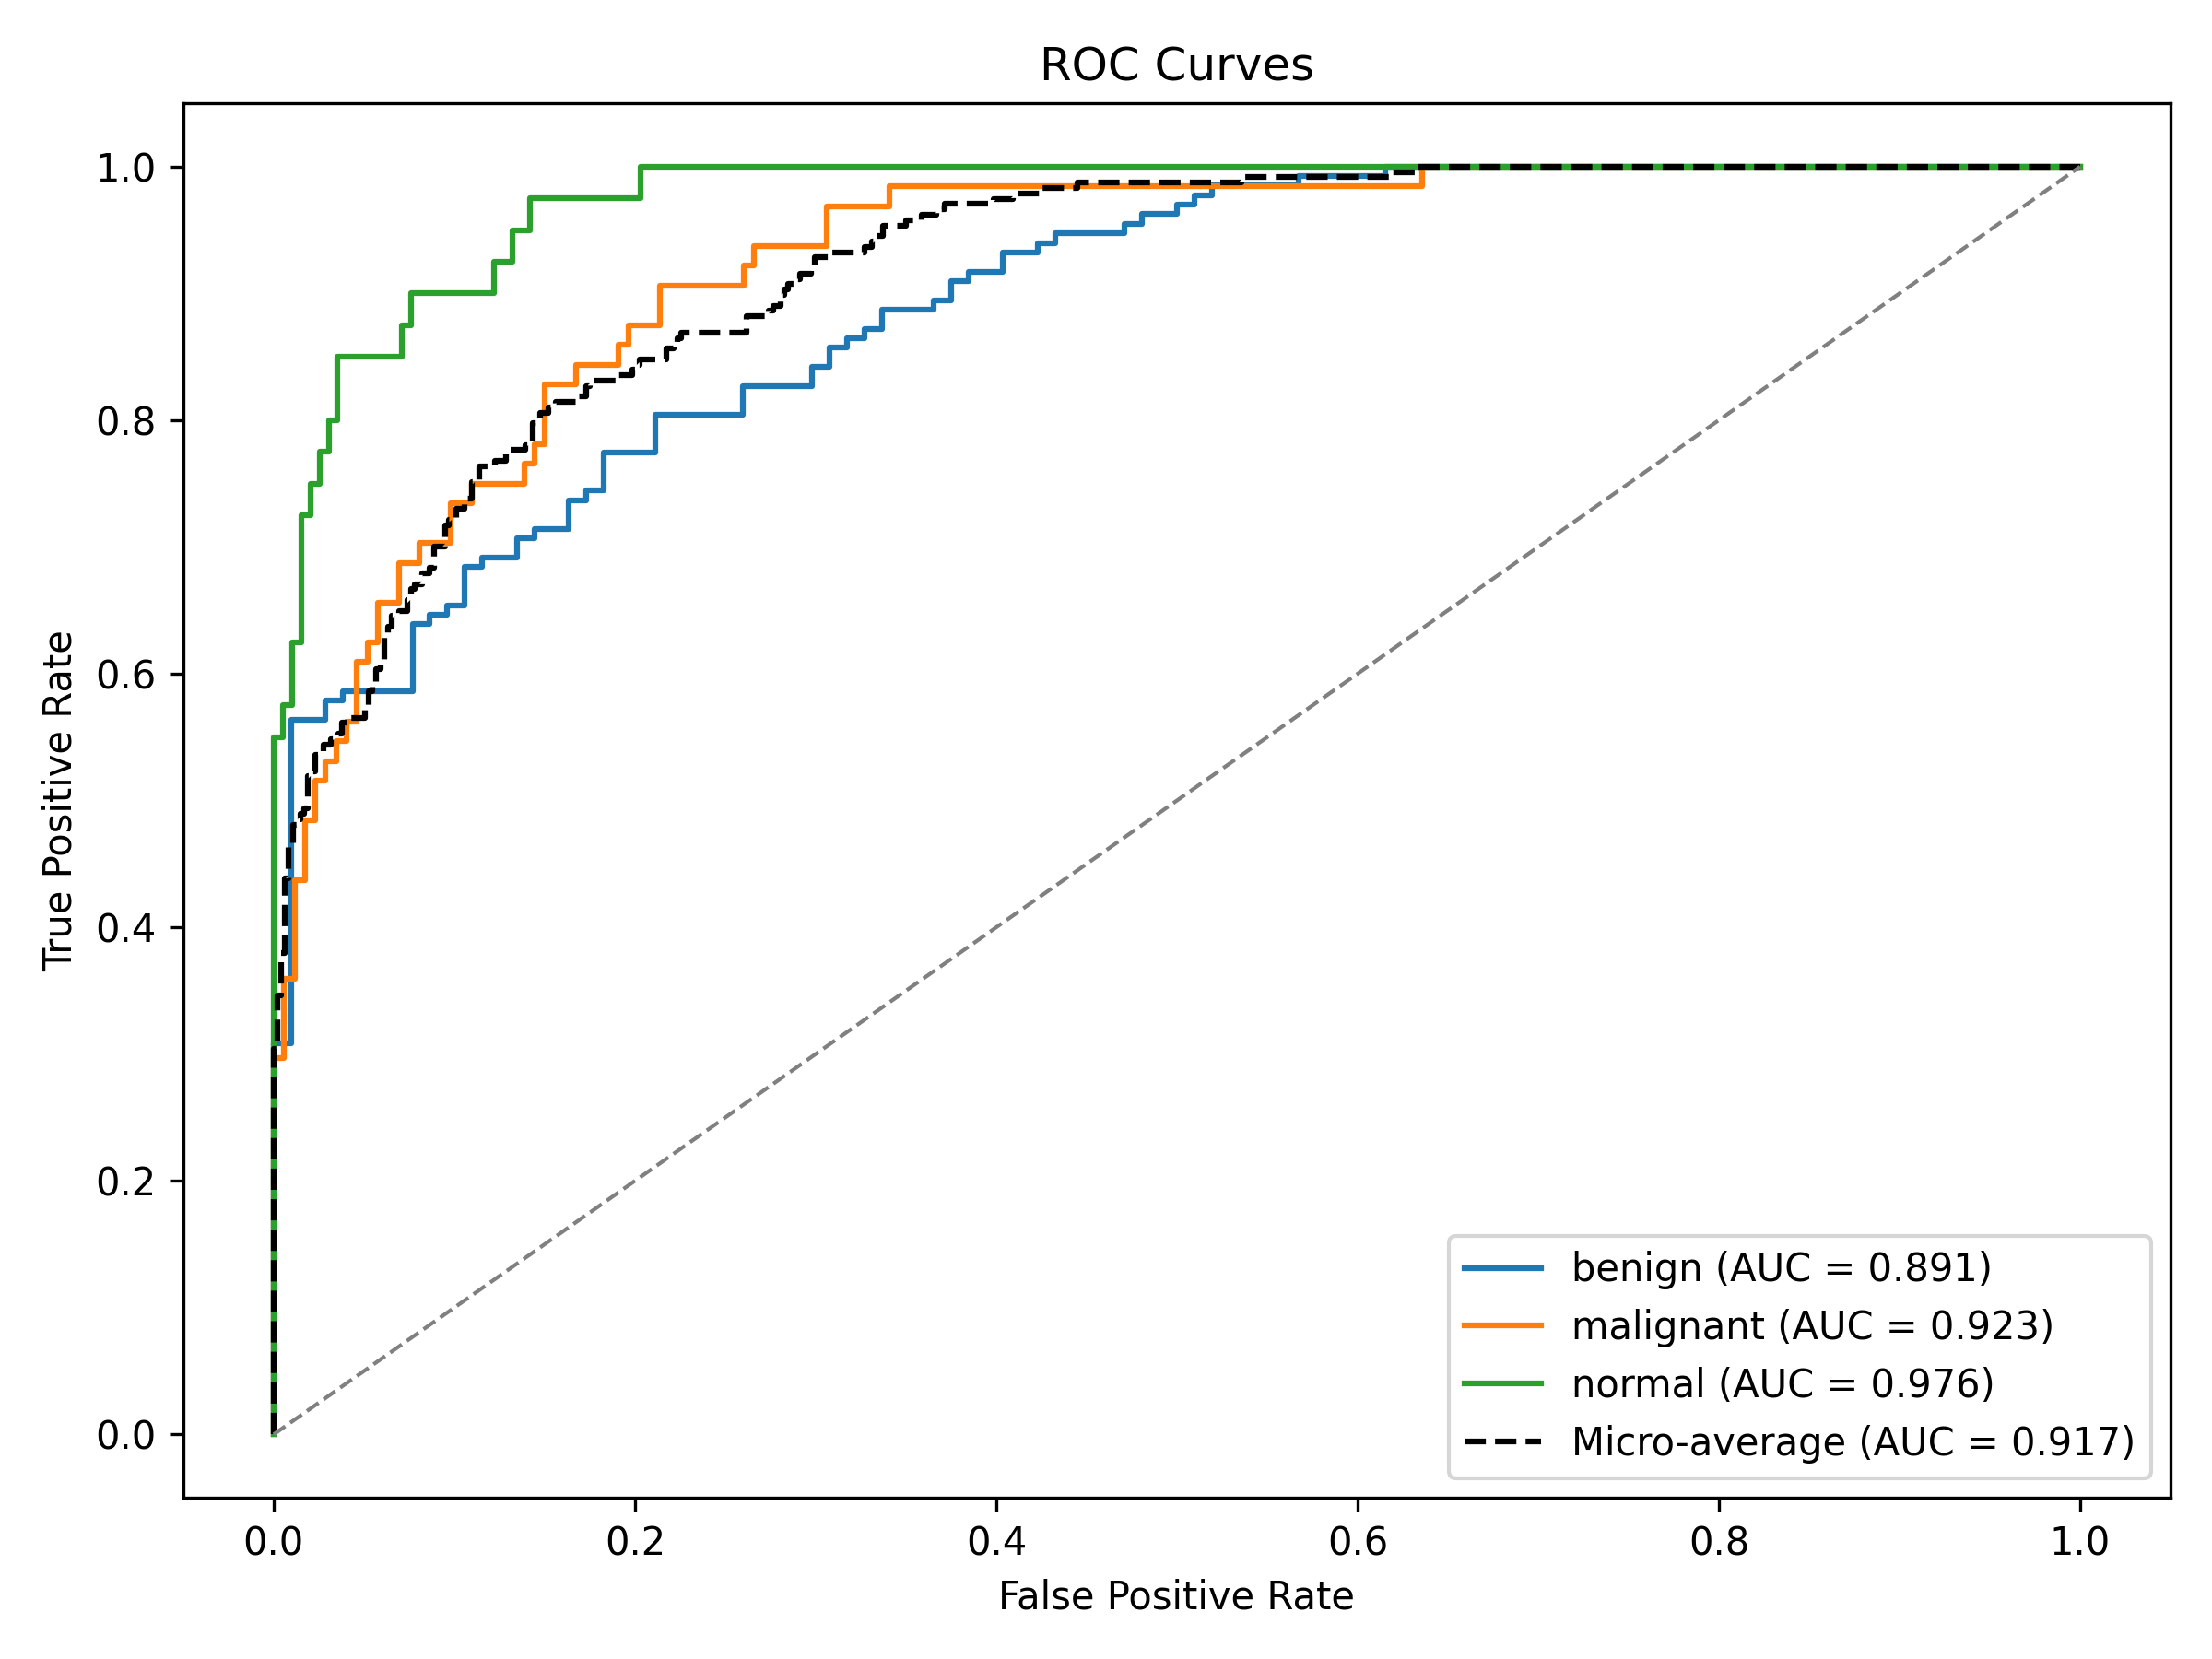

In [13]:
# Étape 4 — Affichage des visualisations enregistrées
image_paths = [
    ("Matrice de confusion", results["confusion_matrix_path"]),
    ("Matrice de confusion normalisée", results["confusion_matrix_normalized_path"]),
    ("Courbes ROC", results["roc_curves_path"]),
]

for title, path in image_paths:
    if os.path.exists(path):
        display(Image(filename=path))
    else:
        print(f"Impossible de trouver '{path}'.")

### Téléchargement des artefacts

In [14]:
# Étape 5 — Téléchargement des fichiers générés
artefacts = [
    results["confusion_matrix_path"],
    results["confusion_matrix_normalized_path"],
    results["roc_curves_path"],
    results["classification_report_path"],
    results["metrics_path"],
]

for artefact in artefacts:
    if os.path.exists(artefact):
        files.download(artefact)
    else:
        print(f"Fichier introuvable : {artefact}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>